In [2]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#seabornのスタイルを適用しグラフを見やすくする
sns.set()

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [19]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3 141
 139   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   9 254 254   8   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   9 254 254   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   9 254 254 106   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   9 254 254 184   0   0   0   0   0   0   

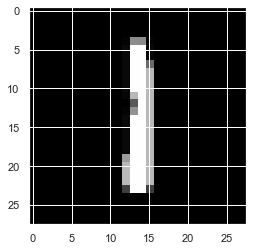

In [10]:
#1行に１つの画像のピクセル情報が入っているのでreshapeしてグレー画像を表示する関数をつくる
def output_gray_image(df, i):
    #それぞれの行からlabelカラムを消してピクセルデータのみにする
    img = df.drop(["label"], axis=1).iloc[i].values
    print(img)
    img = img.reshape((28, 28))
    plt.imshow(img, cmap='gray')

output_gray_image(train_df, 2)
    


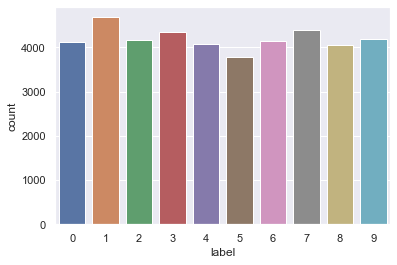

In [11]:
#それぞれのlabelが何個ずつくらいあるか確認
sns.countplot(train_df["label"])

In [15]:
train_df.isnull().sum()
test_df.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [22]:
#データの前処理
Y_train = train_df["label"]
X_train = train_df.drop(labels = ["label"], axis= 1)

In [23]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_train = X_train/255.0
X_test = test_df /255.0

In [29]:
#kerasのimport
import keras
from keras import callbacks
from keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
num_classes = 10
 
#28×28の行列に変換(reshapeについて再確認する)
X_train= X_train.reshape(len(X_train),28,28,-1)
X_test = X_test.reshape(len(X_test),28,28,-1)
 
#y_trainをonehotベクトルへ
y_train= keras.utils.to_categorical(Y_train, num_classes)

In [30]:
X_train.shape

(42000, 28, 28, 1)

In [32]:
X_test.shape

(28000, 28, 28, 1)

In [33]:
#modelの構築
model = Sequential()
model.add(Conv2D(32,(3,3), strides=(1, 1), padding='same', activation="relu",input_shape = (28,28,1),data_format = "channels_last", use_bias = True))
model.add(Conv2D(32,(3,3), strides=(1, 1), padding='same', activation="relu", use_bias = True))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3), strides=(1, 1), padding='same', activation="relu", use_bias = True))
model.add(Conv2D(64,(3,3), strides=(1, 1), padding='same', activation="relu", use_bias = True))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation = "relu", use_bias = True))
model.add(Dropout(0.5))
model.add(Dense(10,activation = "softmax",use_bias = True))

In [34]:
#最適化手法にRMSpropを用いる。勾配の大きさに応じて学習率を調整
optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [35]:
#モデルの設定
model.compile(optimizer = optimizer,loss = "categorical_crossentropy",metrics = ['accuracy'])

In [36]:
#損失関数を速く大域的解に収束させるため動的に学習率を減少させる
learning_rate_reduction = callbacks.ReduceLROnPlateau(monitor='loss',patience=3, verbose=1,factor=0.2,min_lr=0.00001)

In [37]:
#回転や拡大などでデータを何倍にも増やして、学習させる
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  #回転
        zoom_range = 0.1, # 拡大
        width_shift_range=0.1,  # 横にずらす
        height_shift_range=0.1,  # 縦にずらす
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)

In [38]:
#学習開始
model.fit_generator(datagen.flow(X_train,y_train,batch_size = 100),epochs = 40,steps_per_epoch=X_train.shape[0] // 100, callbacks=[learning_rate_reduction])


Epoch 1/40
420/420 [==============================] - 133s 316ms/step - loss: 0.5048 - accuracy: 0.8663
Epoch 2/40
420/420 [==============================] - 132s 314ms/step - loss: 0.1791 - accuracy: 0.9544
Epoch 3/40
420/420 [==============================] - 128s 304ms/step - loss: 0.1443 - accuracy: 0.9634
Epoch 4/40
420/420 [==============================] - 129s 306ms/step - loss: 0.1294 - accuracy: 0.9675
Epoch 5/40
420/420 [==============================] - 128s 305ms/step - loss: 0.1147 - accuracy: 0.9723
Epoch 6/40
420/420 [==============================] - 128s 305ms/step - loss: 0.1146 - accuracy: 0.9730
Epoch 7/40
420/420 [==============================] - 127s 303ms/step - loss: 0.1072 - accuracy: 0.9748
Epoch 8/40
420/420 [==============================] - 127s 303ms/step - loss: 0.1035 - accuracy: 0.9756
Epoch 9/40
420/420 [==============================] - 127s 303ms/step - loss: 0.1073 - accuracy: 0.9761
Epoch 10/40
420/420 [==============================] - 128s 305

In [39]:
y_pred = model.predict(X_test)

In [40]:
#確認
y_pred

array([[4.8998965e-23, 2.2876471e-27, 1.0000000e+00, ..., 5.6638215e-18,
        1.4686072e-17, 5.7217393e-25],
       [1.0000000e+00, 2.5898776e-15, 4.4140511e-11, ..., 3.3887122e-14,
        2.8096309e-10, 7.5176783e-12],
       [2.1864454e-28, 2.9928274e-29, 2.9178589e-23, ..., 8.9441948e-17,
        3.2185929e-17, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.8754279e-24, ..., 6.2578129e-32,
        6.1840266e-27, 2.5221402e-34],
       [5.4598321e-15, 1.0168432e-18, 8.6068308e-17, ..., 1.0180272e-10,
        5.0730189e-14, 9.9999988e-01],
       [6.5400606e-27, 4.2747994e-35, 1.0000000e+00, ..., 5.3084091e-23,
        1.0300979e-18, 2.2004525e-28]], dtype=float32)

In [41]:
#0～９の確率の最大をfinalとして答えとする
y_pred_final = []
for i in y_pred:
    y_pred_final.append(np.argmax(i))

In [42]:
#提出用csvの作成
results = pd.Series(y_pred_final, name="Label")
submit = pd.concat([pd.Series(range(1,28001), name="ImageId"), results], axis = 1)
submit.to_csv("digit_recognizer.csv", index=False)